In [21]:
from useful_scit.imps import *

In [22]:
path = '/Volumes/mbProD/Downloads/flex_out/run_2019-05-25_23-19-34_'

In [23]:
head = os.path.join(path,'header*d01*')
head = glob.glob(head)[0]
head = xr.open_dataset(head)

In [24]:
files = os.path.join(path,'flxout_d01*')
files = glob.glob(files)
files.sort()
# files = [xr.open_dataset(f) for f in files[10:]]
ff = []
for f in files:
    try: ff.append(xr.open_dataset(f))
    except: pass

In [25]:
ds = xr.concat(ff,dim='Time')
ds = ds.assign_coords(ZTOP=head.ZTOP)
ds = ds.assign_coords(XLAT=head.XLAT)
ds = ds.assign_coords(XLONG=head.XLONG)

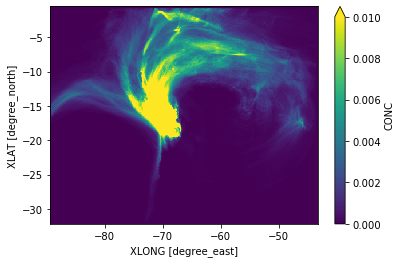

In [29]:
ds.CONC.isel(ageclass=1).mean(dim=['Time','bottom_top']).plot(x='XLONG',y='XLAT',vmax=.01)

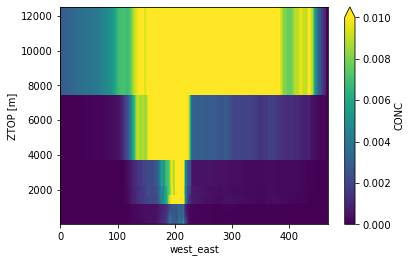

In [27]:
ds['CONC'].isel(ageclass=1).mean(dim=['Time','south_north']).plot(x='west_east',y='ZTOP',vmax=.01)

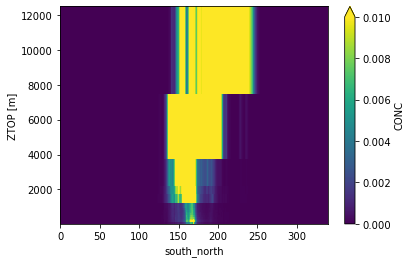

In [8]:
ds['CONC'].isel(ageclass=1).mean(dim=['Time','west_east']).plot(x='south_north',y='ZTOP',vmax=.01)

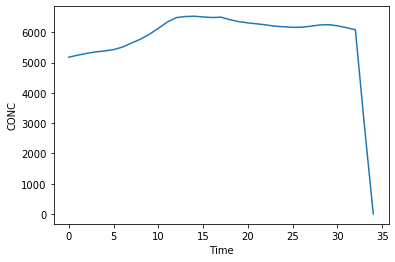

In [9]:
ds.CONC.isel(ageclass=1).sum(dim=['west_east','south_north','bottom_top']).plot()